# Phase Plot dan Fungsi Lyapunov

In [1]:
#####################################################
####REFERENCE https://stackoverflow.com/questions/60113260/plotting-the-phase-portrait-for-a-system-of-3-ode-by-matplotlib
#####################################################

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
# from scipy.integrate import solve_ivp, odeint

kl = 1
vl = 1
def dynamical_model(X,t):
    x1, x2, V = X
    dx1dt = vl * np.sin(x2)
    dx2dt = -1 * ((kl * x2) + (vl * x1 * np.sin(x2) / x2))
    dVdt = -1 * kl * np.square(x2)
    return [dx1dt,dx2dt,dVdt]

def f(x1_0f, x2_0f):
    v = 1
    dt = 0.01
    k = 1
#     l = 1
#     k1 = 1
#     d = np.arctan(l / v * ((k1 * x1_0) + (v * x1_0 * np.sin(x2_0) / (np.sin(x2_0) + 10**-34))))
#     x2_dot = -1  * np.tan(d) * v / l
    x1_dot = v * np.sin(x2_0f)
    x2_dot = -1 * ((k * x2_0f) + (v * x1_0f * np.sin(x2_0f) / x2_0f))
    x1f = x1_0f + (x1_dot * dt)
    x2f = x2_0f + (x2_dot * dt)
    V_0f = np.square(x1_0f) + np.square(x2_0f)
    Vf = np.square(x1f) + np.square(x2f)
    return x1f, x2f, V_0f, Vf

# Integrate
i_n = 10000
X10r = np.zeros(i_n)
X20r = np.zeros(i_n)
V0r = np.zeros(i_n)
X1r = np.zeros(i_n)
X2r = np.zeros(i_n)
Vr = np.zeros(i_n)

# Quivers
q_n = 1
X1q = np.zeros(q_n)
X2q = np.zeros(q_n)
Vq = np.zeros(q_n)
uq = np.zeros(q_n)
vq = np.zeros(q_n)
wq = np.zeros(q_n)

def intgr(x1s,x2s):
    X10r[0] = x1s
    X20r[0] = x2s
    X1r[0], X2r[0], V0r[0], Vr[0] = f(X10r[0], X20r[0])
    i = 0
    while (np.abs(X1r[i]) > 0.0001) and (np.abs(X2r[i]) > 0.0001):
        X10r[i+1] = X1r[i]
        X20r[i+1] = X2r[i]
        X1r[i+1], X2r[i+1], V0r[i+1], Vr[i+1] = f(X10r[i+1], X20r[i+1])
        i = i + 1
        if i > (i_n-1):
            break
    quiver(i)

def quiver(j):
#     j = j * 0.3
#     step = np.floor(j / q_n)
    step = j * 0.05
    step = int(step)
    for a in range(q_n):
        idx = a * step
        X1q[a] = X10r[idx]
        X2q[a] = X20r[idx]
        Vq[a] = V0r[idx]
        uq[a] = X1r[idx] - X10r[idx]
        vq[a] = X2r[idx] - X20r[idx]
        wq[a] = Vr[idx] - V0r[idx]

x1_0s = np.linspace(-5., 5., 6)
x2_0s = np.linspace(-5., 5., 6)
n = len(x1_0s) * len(x2_0s)
X0s = np.zeros((n, 3))
i = 0
result = np.zeros((n, 3, i_n))
result_q = np.zeros((n, 6, q_n))
for j in range(len(x1_0s)):
    for k in range(len(x2_0s)):
        V0s = np.square(x1_0s[j]) + np.square(x2_0s[k])
        X0s[i,0] = x1_0s[j]
        X0s[i,1] = x2_0s[k]
        X0s[i,2] = V0s
        intgr(x1_0s[j], x2_0s[k])
        result[i] = np.array([X10r, X20r, V0r])
        result_q[i] = np.array([X1q, X2q, Vq, uq, vq, wq])
        i = i + 1



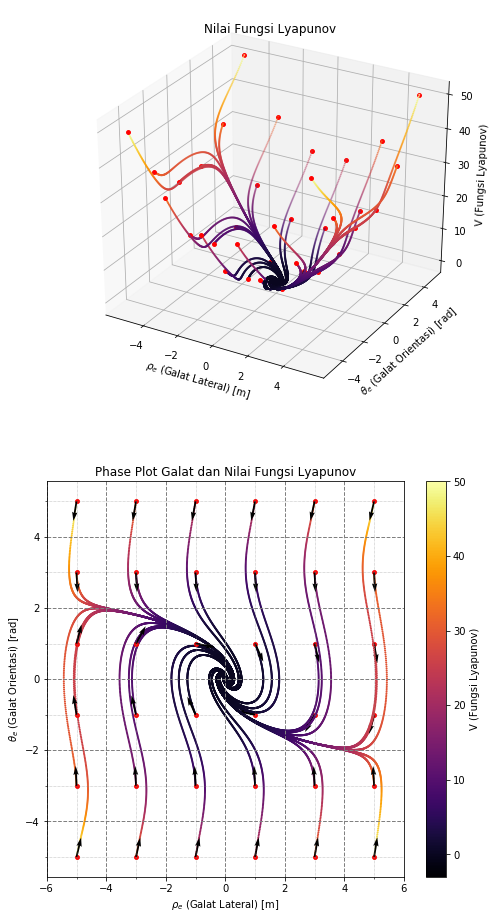

In [2]:
from matplotlib.ticker import MultipleLocator

fig=plt.figure(figsize=(8,16))
# ax = plt.axes(projection="3d")
ax1 = fig.add_subplot(2,1,1,projection='3d')
ax1.set_title('Nilai Fungsi Lyapunov')
ax1.set_xlabel(r'$\rho_e$ (Galat Lateral) [m]')
ax1.set_ylabel(r'$\theta_e$ (Galat Orientasi) [rad]')
ax1.set_zlabel('V (Fungsi Lyapunov)')

ax2 = fig.add_subplot(2,1,2)
ax2.set_title('Phase Plot Galat dan Nilai Fungsi Lyapunov')
ax2.set_xlabel(r'$\rho_e$ (Galat Lateral) [m]')
ax2.set_ylabel(r'$\theta_e$ (Galat Orientasi) [rad]')
ax2.set_xlim(-6, 6)
ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax2.xaxis.set_minor_locator(MultipleLocator(1))
ax2.grid(color='grey', linestyle='--', linewidth=1, which='major')
ax2.grid(color='grey', linestyle=':', linewidth=0.5, which='minor')


norm = plt.Normalize(-3, 50)

for k in range(n):
    x1 = result[k,0]
    x2 = result[k,1]
    V = result[k,2]
#     ax1.plot(x1, x2, V, lw=1)
    ax1.scatter(x1, x2, V, c=V, cmap='inferno', norm=norm, s=1)
    ax1.scatter(X0s[k,0], X0s[k,1], X0s[k,2], s=15, c='r')
#     ax1.quiver(result_q[k,0], result_q[k,1], result_q[k,2],
#               result_q[k,3], result_q[k,4], result_q[k,5], normalize=True, colors='blue')
    cbo = ax2.scatter(x1, x2, c=V, cmap='inferno', norm=norm, s=1)
    ax2.scatter(X0s[k,0], X0s[k,1], s=15, c='r')
    ax2.quiver(result_q[k,0], result_q[k,1],
              0.07*result_q[k,3], 0.07*result_q[k,4], width=0.005)

cb = fig.colorbar(cbo)
cb.ax.set_ylabel('V (Fungsi Lyapunov)')
plt.show()

### Alternatif

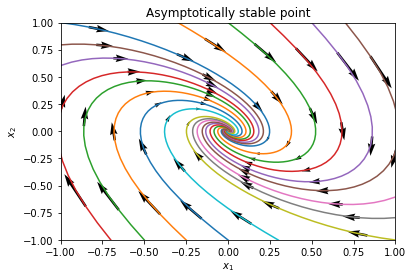

In [3]:
##################################################
####REFERENCE https://python-control.readthedocs.io/en/0.8.3/phaseplots.html
##################################################

import numpy as np
import matplotlib.pyplot as plt
from control.phaseplot import phase_plot
from numpy import pi

# Clear out any figures that are present
plt.close('all')

#
# Systems of ODEs: damped oscillator example (simulation + phase portrait)
#

def lyapunov(X,t):
#     x1, x2, V = X
    kl = 1
    vl = 1
    x1, x2 = X
    dx1dt = vl * np.sin(x2)
    dx2dt = -1 * ((kl * x2) + (vl * x1 * np.sin(x2) / x2))
#     dVdt = -1 * kl * np.square(x2)
    return [dx1dt,dx2dt]


# Asy stable
plt.figure()
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1 1 1]);

# Quiver and Trajectory
phase_plot(
    lyapunov,
    X0=[
        [-1, 1], [-0.3, 1], [0, 1], [0.25, 1], [0.5, 1], [0.7, 1], [1, 1], [1.3, 1],
        [1, -1], [0.3, -1], [0, -1], [-0.25, -1], [-0.5, -1], [-0.7, -1], [-1, -1],
        [-1.3, -1]
    ],
    T=np.linspace(0, 10, 100),
    timepts=[0.3, 1, 2, 3]
)

# Only quiver
# phase_plot(lyapunov, [-1, 1, 10], [-1, 1, 10], 0.15)

# plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# plt.set(gca,'FontSize', 16)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Asymptotically stable point')


plt.show()

In [7]:
np.sin(0.05) / 0.05

0.9995833854135666